<a href="https://colab.research.google.com/github/Shrieejanani/House_price_prediction/blob/main/Housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMporting Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [2]:
train = pd.read_csv("http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv")
test = pd.read_csv("http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<ipython-input-9-53a8ba986014>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)


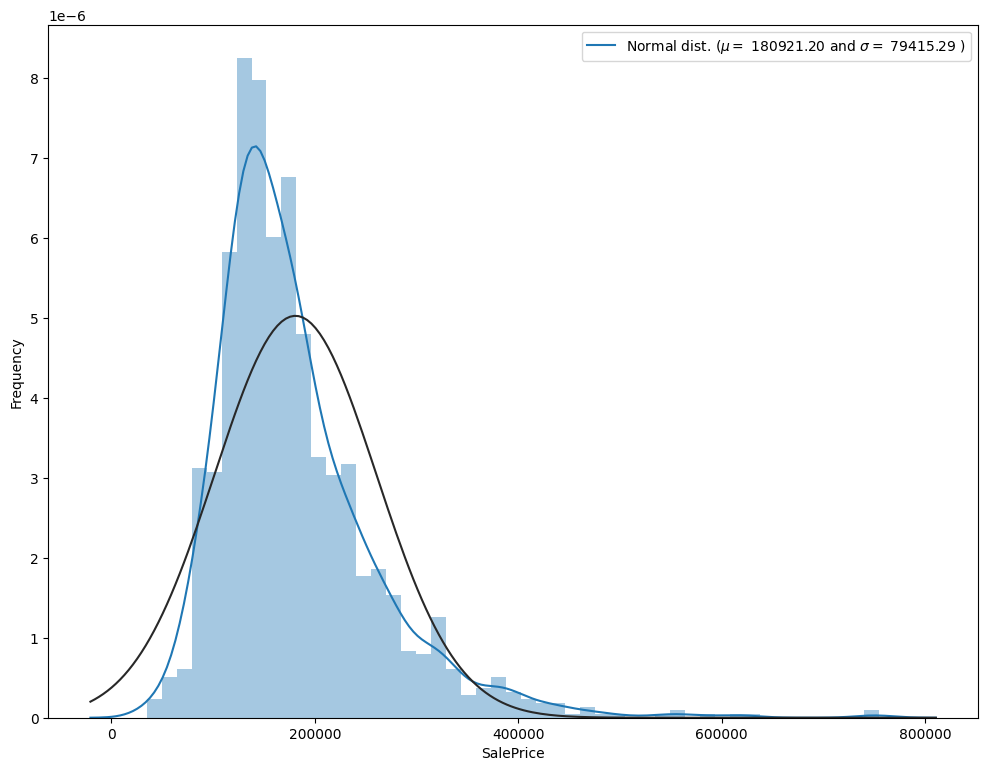

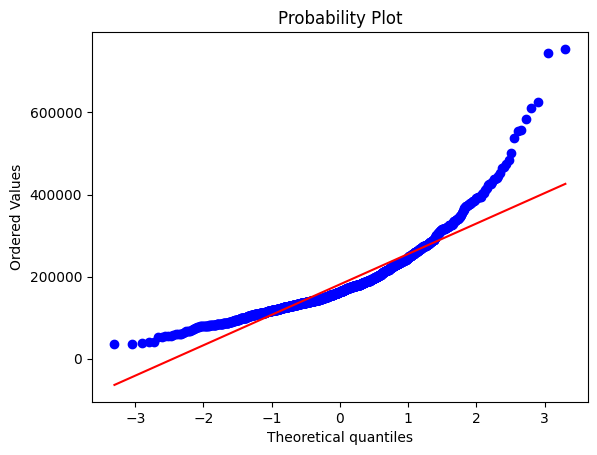

In [9]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<ipython-input-10-52fff8d461ff>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)


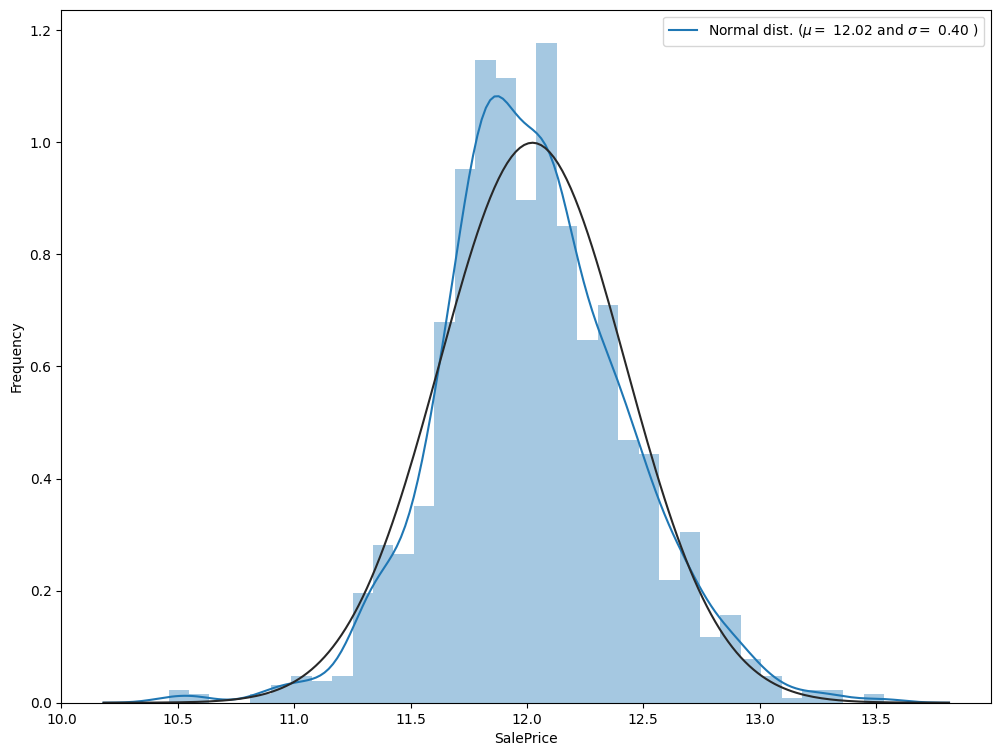

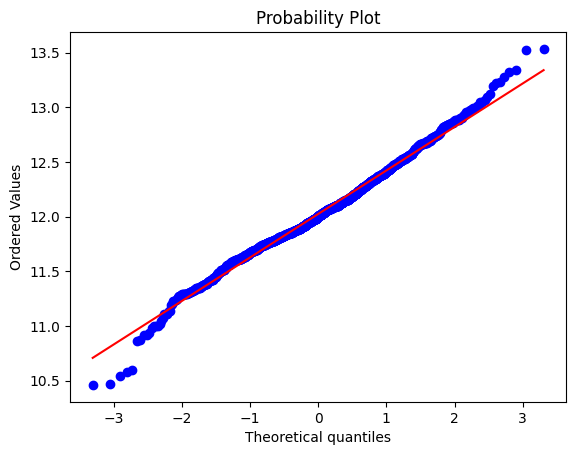

In [10]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
#Let's check if the data set has any missing values.
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

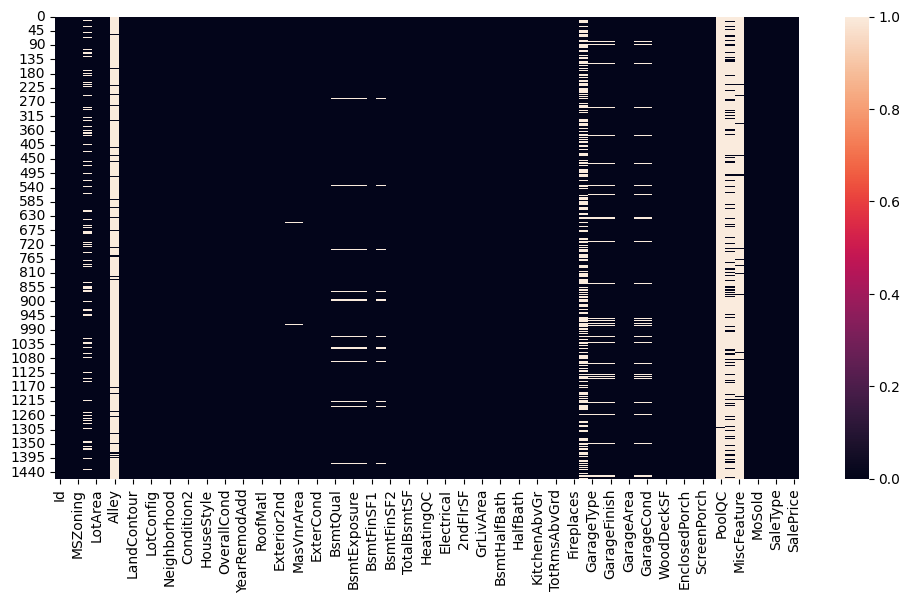

In [12]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [13]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [15]:
Isnull.columns = ['count']

In [16]:
Isnull.index.names = ['Name']

In [17]:
Isnull['Name'] = Isnull.index


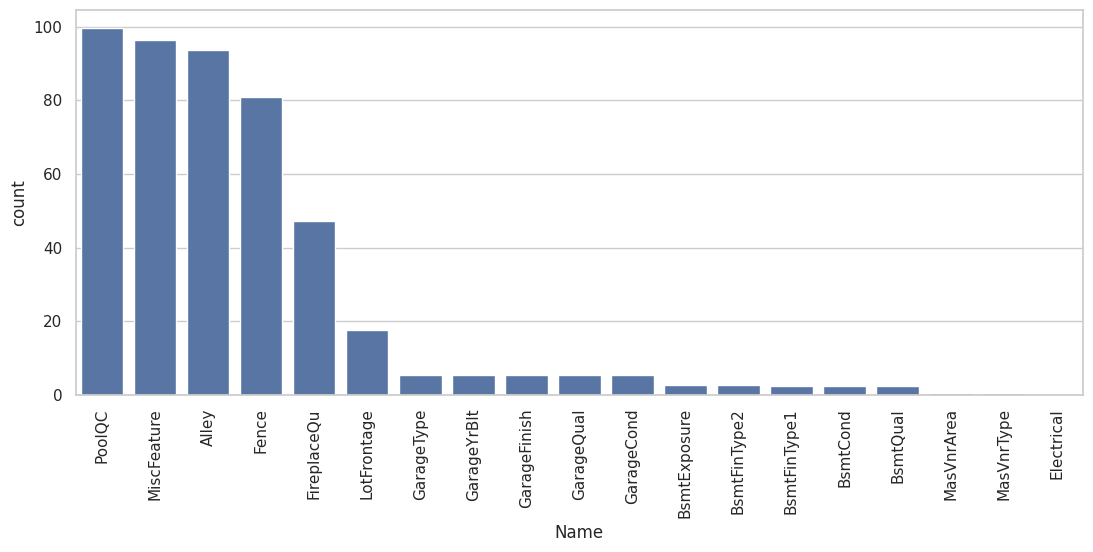

In [19]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [20]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [21]:
train_corr.shape


(1460, 38)

In [22]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

<Axes: >

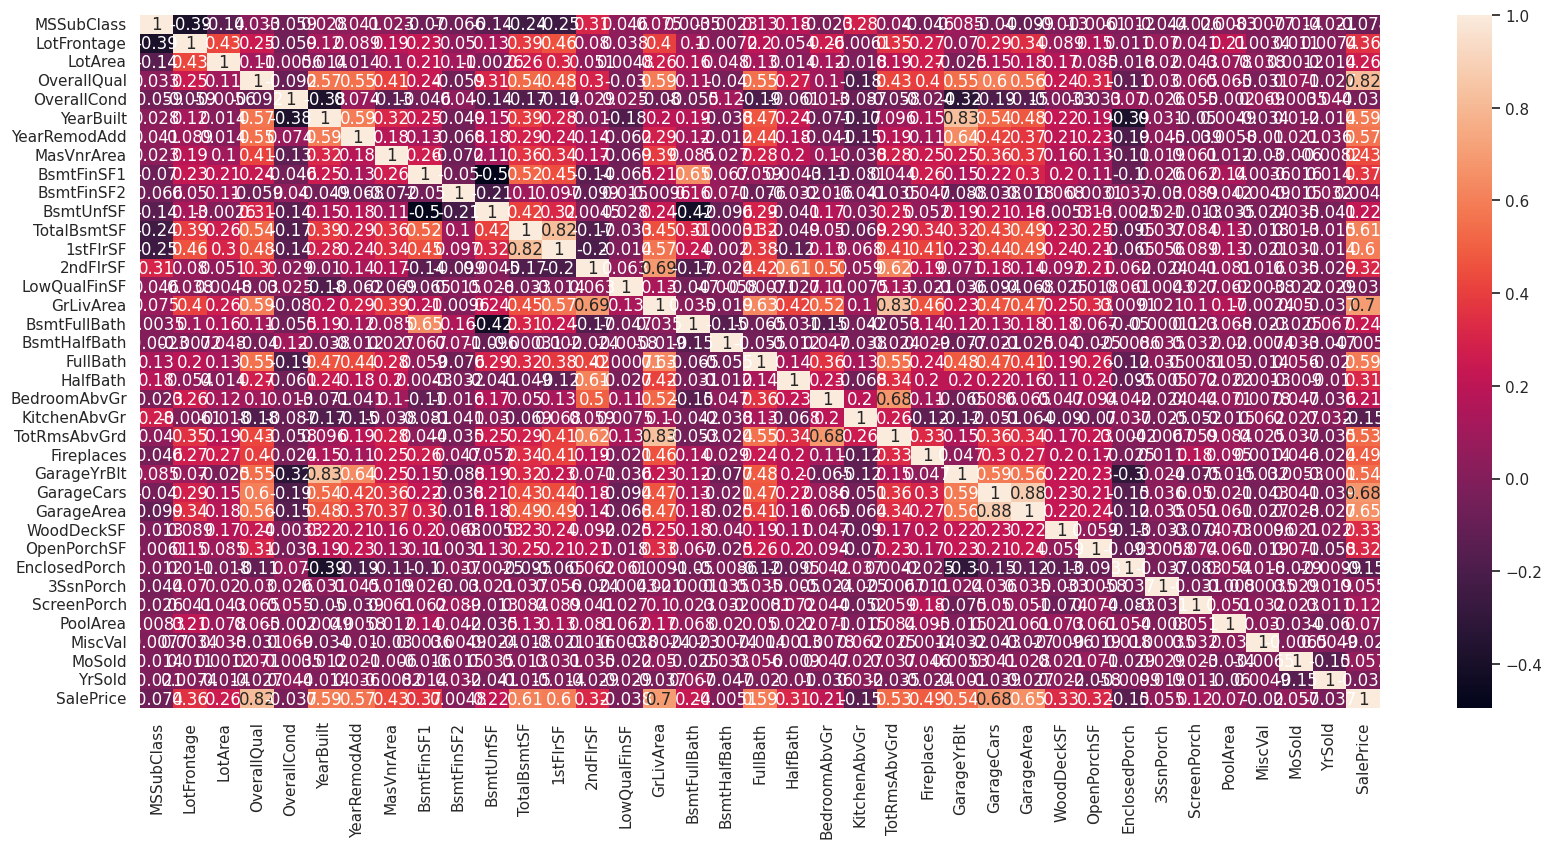

In [23]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

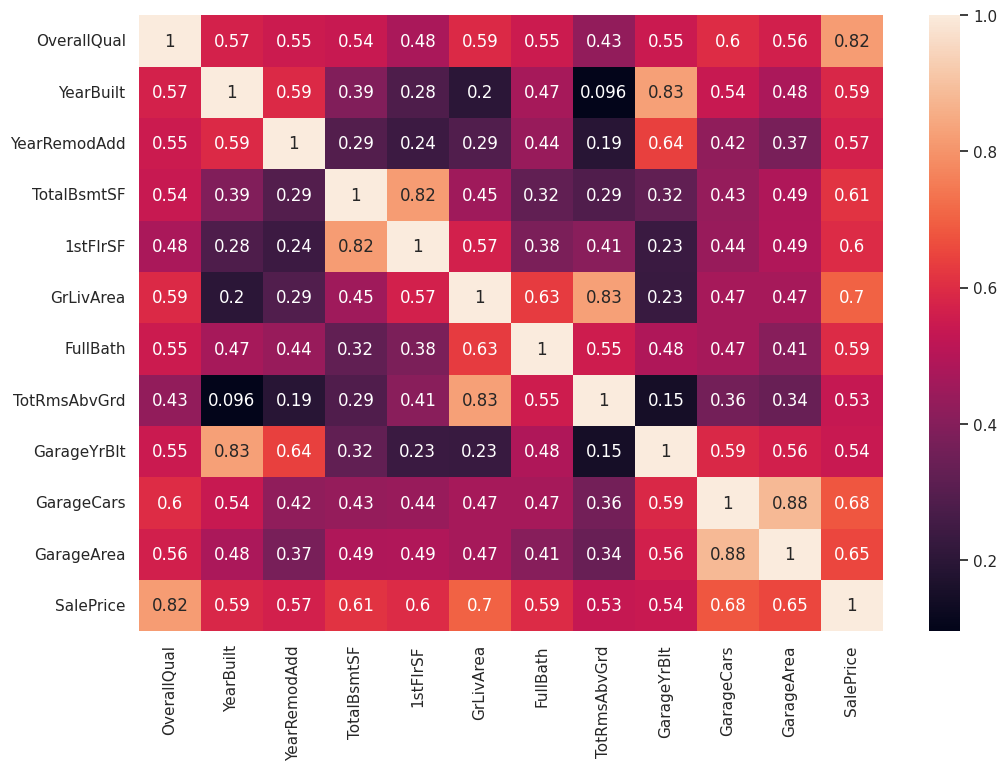

In [24]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [25]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

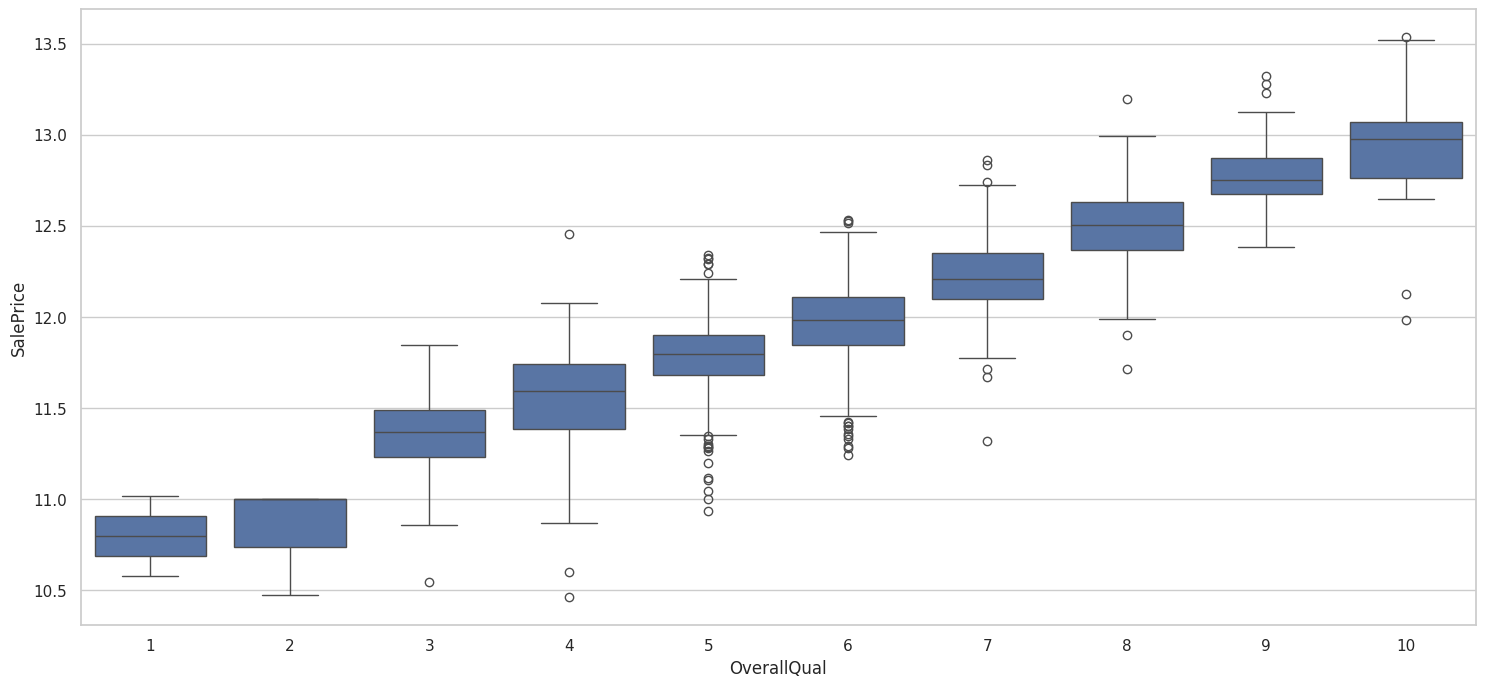

In [28]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


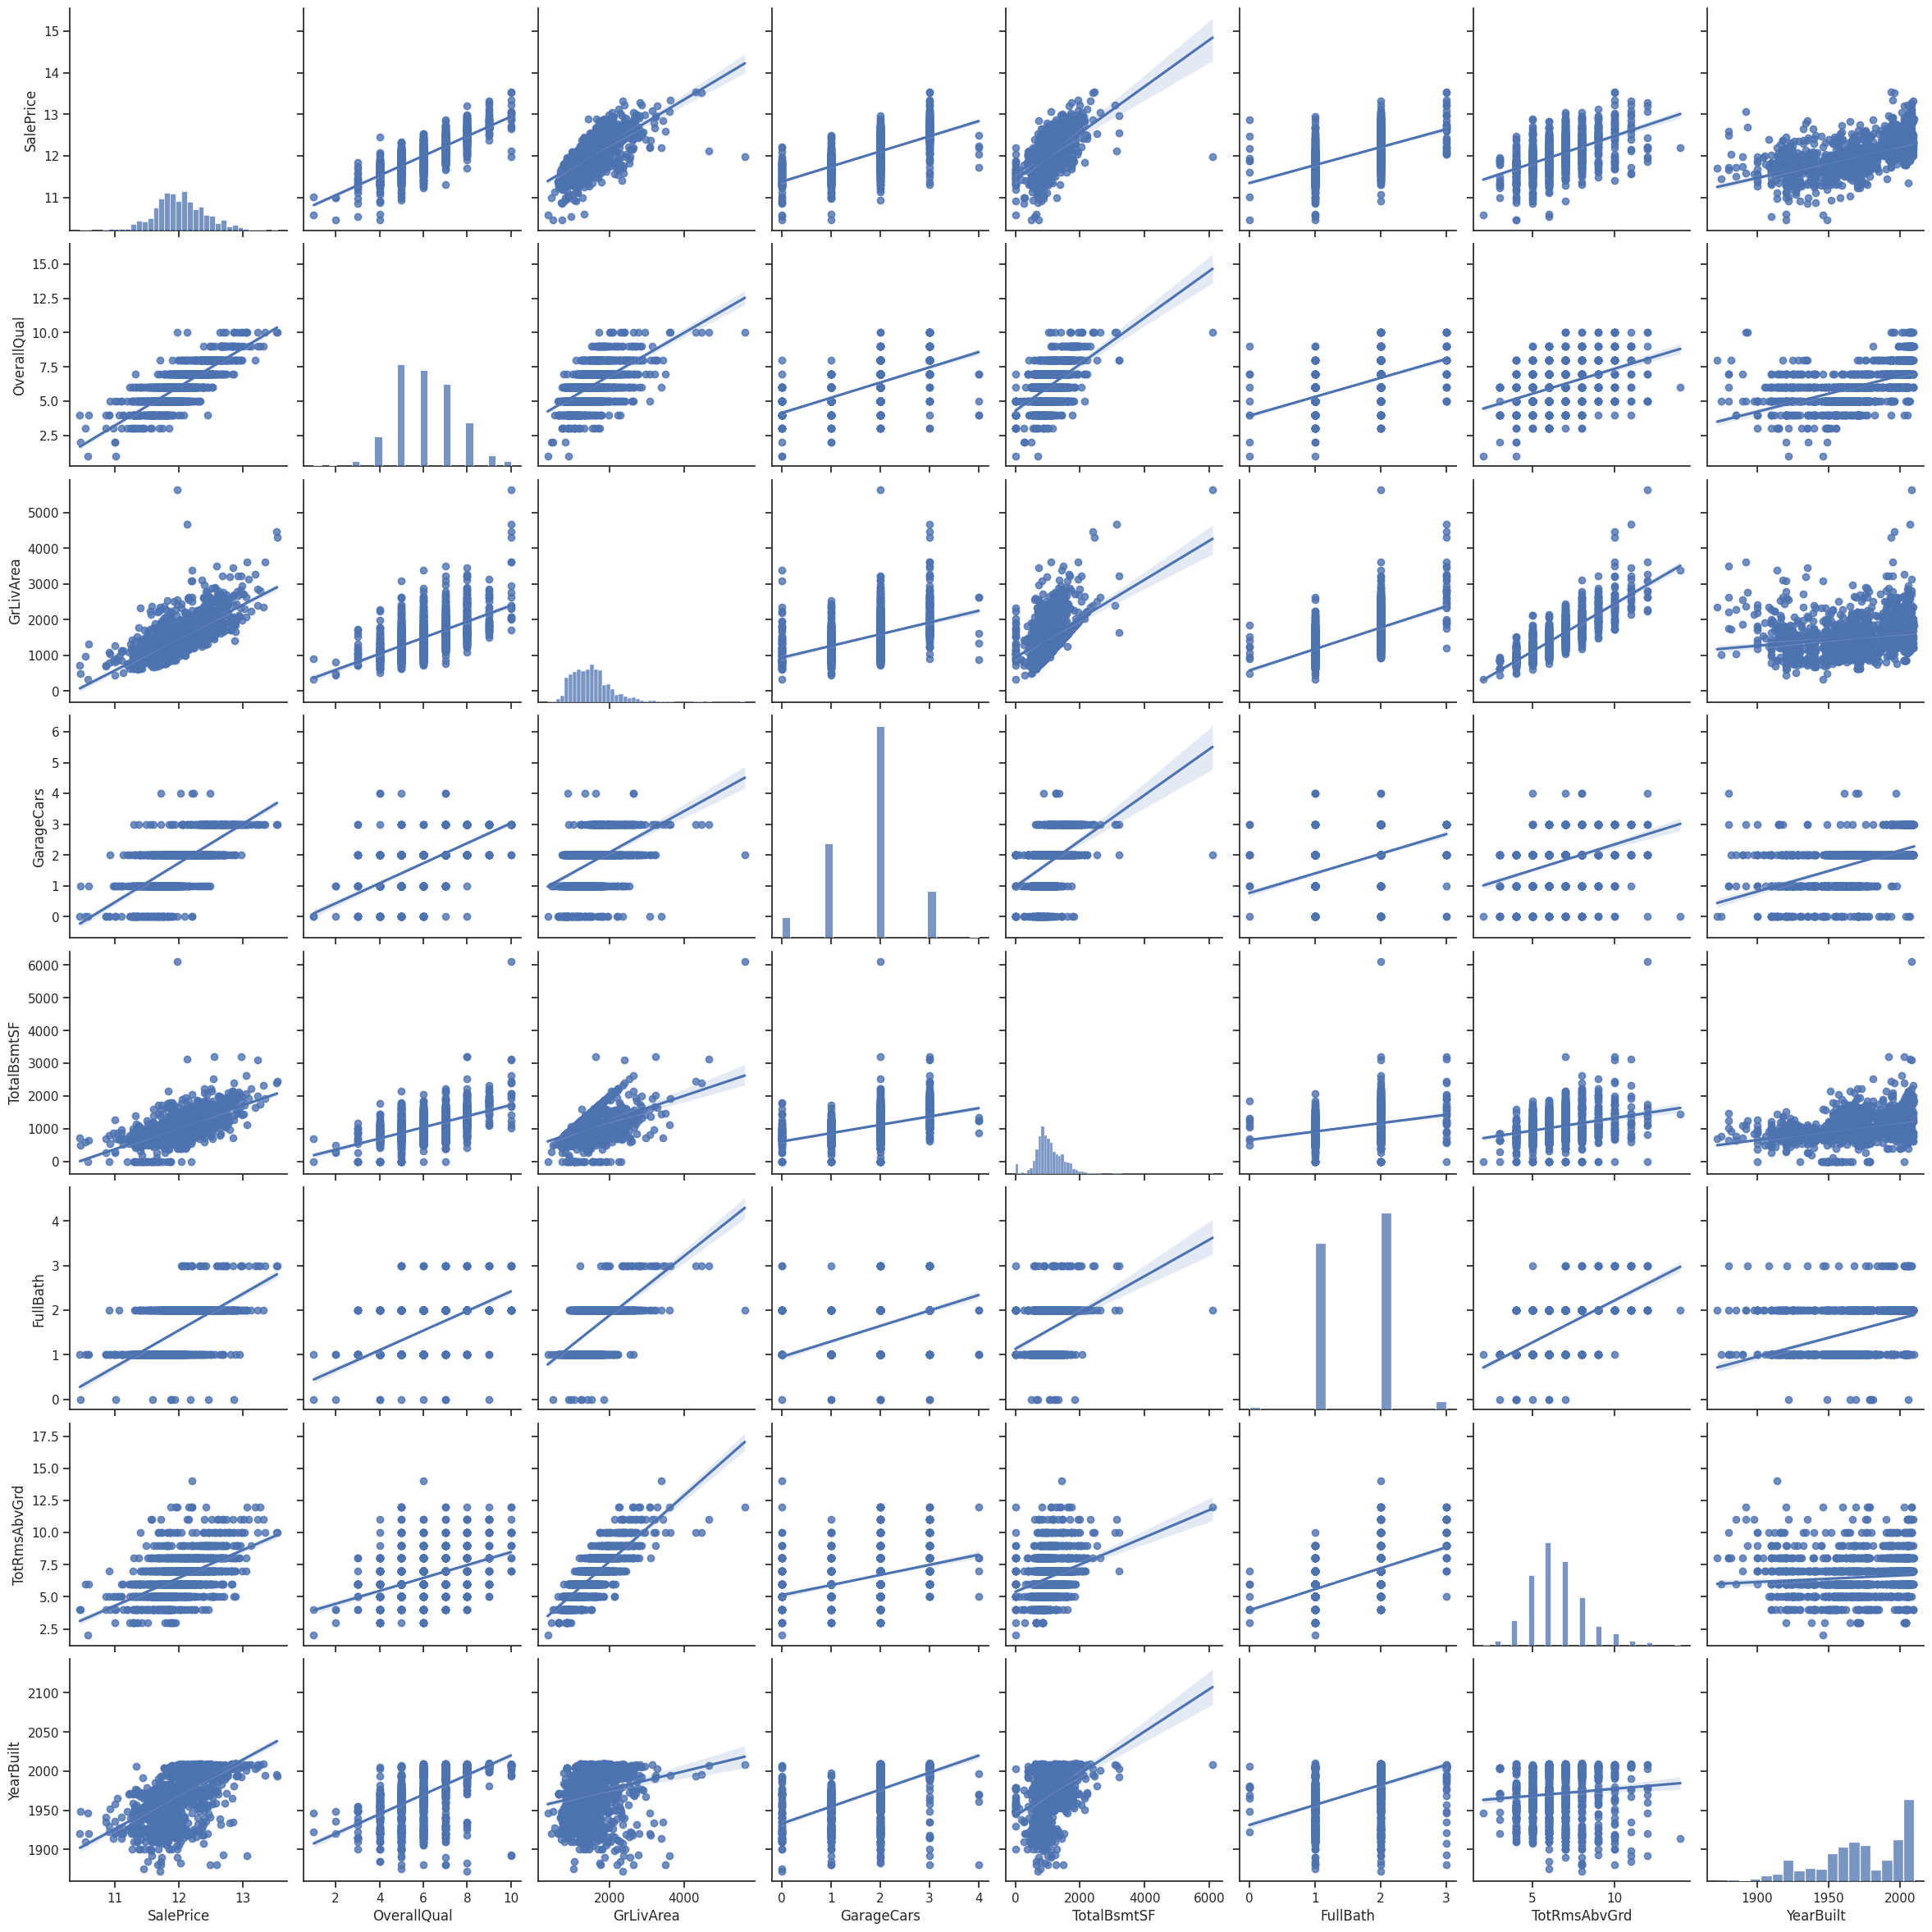

In [30]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [31]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


<ipython-input-31-785333892f23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [32]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [33]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [34]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [35]:
#GarageType, GarageFinish, GarageQual and GarageCond - replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [36]:
#GarageYrBlt, GarageArea and GarageCars - replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [37]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual - replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [38]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [39]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [40]:
 #Electrical-replace with mode values
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [41]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

<Axes: >

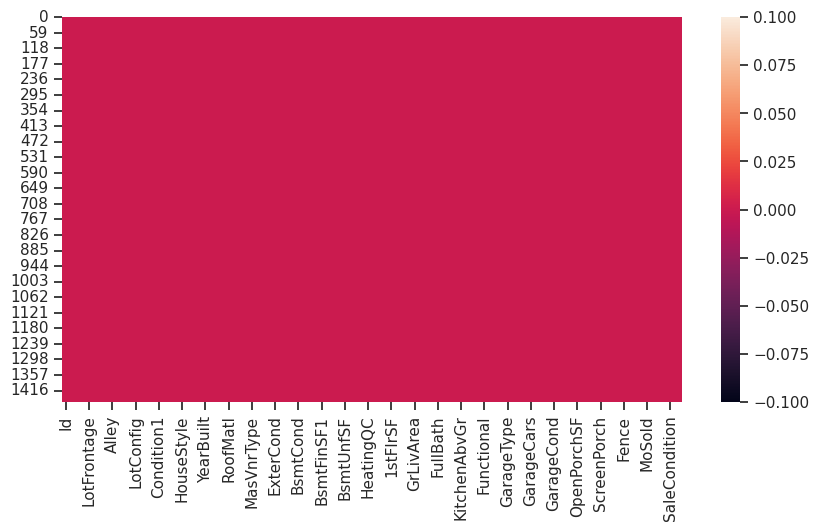

In [42]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

In [43]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature',
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [44]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

In [45]:
#Take target variable- y
y = train['SalePrice']

In [46]:
#Delete the saleprice column
del train['SalePrice']

In [47]:
#Take their values in X and y
X = train.values
y = y.values

In [48]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [49]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [50]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [51]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62221633]
Real value 11.767187766223199


In [52]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161476


In [53]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [54]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [55]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [56]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [57]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.7247718438758
